In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Load data from file
path = os.getcwd() + '/dane1.txt'
print(path)
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

/home/bartek/learning/Machine-learning/02_Linear_regression/dane1.txt


In [5]:
# Examine data
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
# Sort data first
data.sort_values(by='Population', inplace=True)

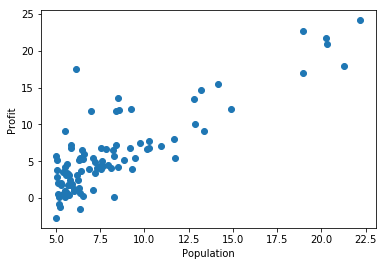

In [8]:
# Plot sorted data
plt.scatter(data['Population'], data['Profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [9]:
def computeCost(X, y, theta):
    return 0.5 * ((X @ theta - y) ** 2).mean()

In [10]:
# Extract data
X = data['Population']
y = data['Profit']

In [11]:
# Test computeCost function
X = np.array(X.values)
y = np.array(y.values)

# Add column of ones to X array
X = np.column_stack([np.ones(X.shape[0]), X])

# Check whether computeCost works correctly
theta = np.array([0,0])
print('Cost: {}'.format(computeCost(X, y, theta)))

Cost: 32.07273387745567


In [12]:
def gradient_prosty(X, y, theta, alpha, it):
    # it - liczba iteracji
    cost = []
    for i in range(it):
        theta = theta - alpha * (X.T @ (X @ theta - y)) / len(y)
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [13]:
# Test 'gradient_prosty' method
alpha = 0.01
it = 1000
theta0 = np.array([0, 0])
theta_best, cost = gradient_prosty(X, y, theta0, alpha, it)

In [14]:
# zad. 8, 9
print('Best coefficients: \ntheta0 = {};\ntheta1 = {}'.format(theta_best[0], theta_best[1]))
print('Cost function for best coefficients: {}'.format(cost[-1]))

Best coefficients: 
theta0 = -3.241402144274422;
theta1 = 1.1272942024281842
Cost function for best coefficients: 4.515955503078912


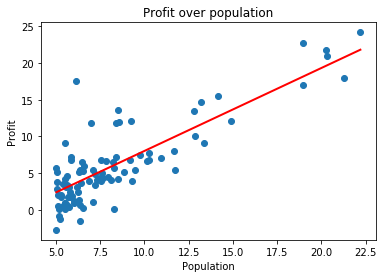

In [15]:
# zad. 10
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ theta_best, 'r', linewidth=2)
plt.title('Profit over population')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

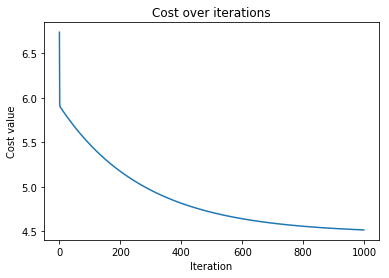

In [16]:
# zad. 11
plt.plot(cost)
plt.title('Cost over iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost value')
plt.show()

# Multivariable linear regression

In [17]:
# Load new data
path = os.getcwd() + '/dane2.txt'
data_raw = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data_raw.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
# Normalize data in DataFrame
data2 = (data_raw - data_raw.mean()) / data_raw.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [19]:
# Extract data
X = data2[['Size', 'Bedrooms']]
y = data2['Price']

In [20]:
# Test computeCost function
X = np.array(X.values)
y = np.array(y.values)

# Add column of ones to X array
X = np.column_stack([np.ones(X.shape[0]), X])

# Check whether computeCost works correctly
theta = np.array([0, 0, 0])
print('Cost: {}'.format(computeCost(X, y, theta)))

Cost: 0.48936170212765967


In [21]:
# Test 'gradient_prosty' method
alpha = 0.01
it = 1000
theta0 = np.array([0, 0, 0])
theta_best, cost = gradient_prosty(X, y, theta0, alpha, it)

In [22]:
# Display best coefficients and value of cost function
print('Best coefficients: \ntheta0 = {};\ntheta1 = {};\ntheta2 = {}'.format(theta_best[0], theta_best[1], theta_best[2]))
print('Cost function for best coefficients: {}'.format(cost[-1]))

Best coefficients: 
theta0 = -1.1079789568094268e-16;
theta1 = 0.8785036522230538;
theta2 = -0.046916657038053894
Cost function for best coefficients: 0.13070336960771892


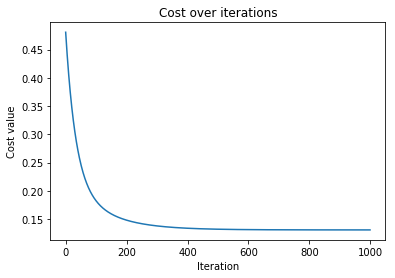

In [23]:
# Plot change of cost function throughout optimization process
plt.plot(cost)
plt.title('Cost over iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost value')
plt.show()

In [24]:
# Generate surface plot of data
# import required package
from mpl_toolkits import mplot3d

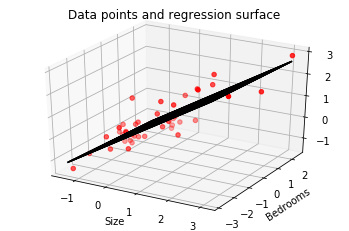

In [25]:
# Make 3D plots - beware that all features' values are normalized
# Data for a three-dimensional line
xline = data2['Size'].values
yline = data2['Bedrooms'].values
zline = data2['Price'].values

# Prepare data for calculated surface
x = np.linspace(xline.min(), xline.max(), 100)
y = np.linspace(yline.min(), yline.max(), 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros((100, 100))
for row in range(X.shape[0]):
    for col in range(X.shape[0]):
        Z[row, col] = theta_best[0] + theta_best[1]*X[row, col] + theta_best[2]*Y[row, col]

# Create 3D plots
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xline, yline, zline, c='red')
ax.plot_wireframe(X, Y, Z, color='black')
plt.xlabel('Size')
plt.ylabel('Bedrooms')
plt.title('Data points and regression surface')
plt.show()

# Linear regression using scikit-learn

In [2]:
# new imports
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Reggression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()

# print description
print(boston.DESCR)

# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# normalize data
X = (boston_X - boston_X.mean()) / boston_X.std()
y = (boston_Y - boston_Y.mean()) / boston_Y.std()

In [4]:
# split data on train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [5]:
# sanity check of data sizes
print('boston_X.shape {}'.format(X.shape))
print('boston_Y.shape {}'.format(y.shape))
print('X_train.shape {}'.format(X_train.shape))
print('X_test.shape {}'.format(X_test.shape))
print('y_train.shape {}'.format(y_train.shape))
print('y_test.shape {}'.format(y_test.shape))

boston_X.shape (506, 13)
boston_Y.shape (506,)
X_train.shape (339, 13)
X_test.shape (167, 13)
y_train.shape (339,)
y_test.shape (167,)


In [6]:
# Create linear regressor object
regr = linear_model.LinearRegression()
 
# Fit the model to train data
regr.fit(X_train, y_train)

# Predict values on test data after learing
y_predicted = regr.predict(X_test)
 
# Show calculated coefficients
print('Coefficients: \n{}'.format(regr.coef_))
 
# Calculate mean squared error
error = np.mean((y_predicted - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
[-1.90101578e+00  8.39308487e-01  9.72724965e-01  3.92367628e+01
 -3.38212643e+02  4.89895774e+01  1.86574235e-01 -2.34024634e+01
  4.71082173e+00 -1.88909334e-01 -1.52316506e+01  1.65202302e-01
 -9.12326827e+00]
Residual sum of squares: 0.24731350511241465


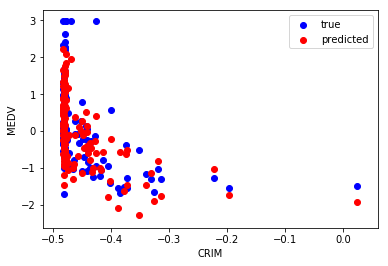

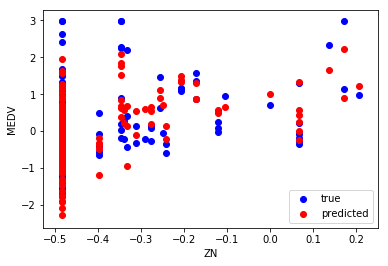

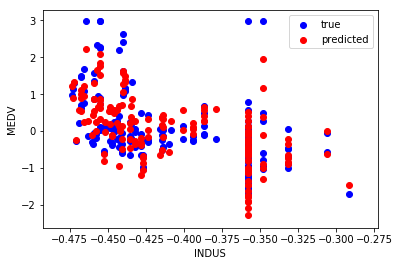

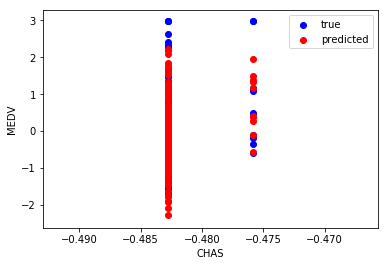

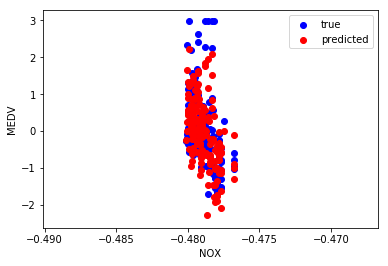

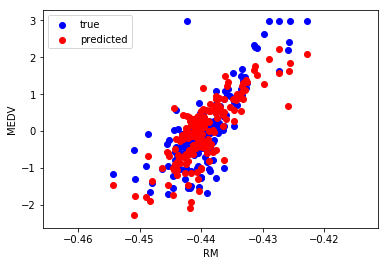

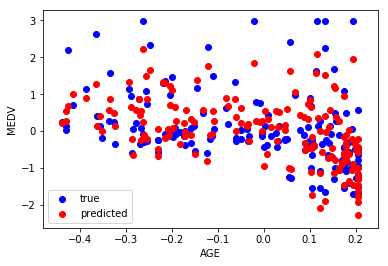

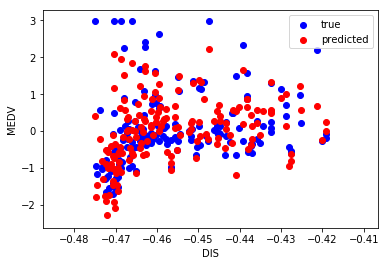

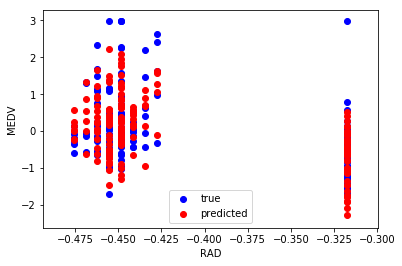

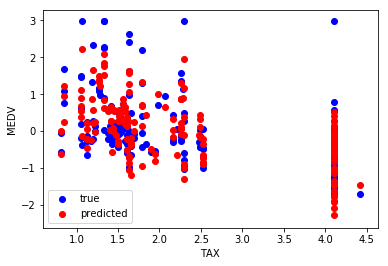

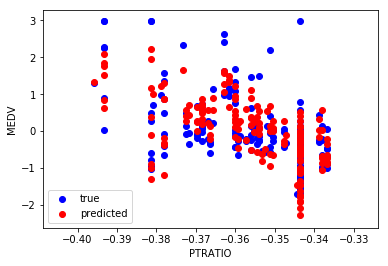

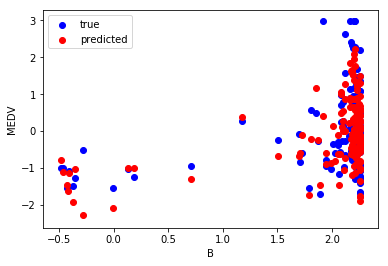

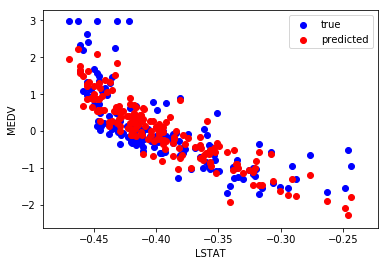

In [7]:
# Visualize
for i, feature in enumerate(boston.feature_names):
    plt.figure(i)
#     plt.scatter(X[:, i], y, c='b')
#     plt.plot(X[:, i], X[:, i] * regr.coef_[i], c='r')
    
    plt.scatter(X_test[:, i], y_test, c='b', label='true')
    plt.scatter(X_test[:, i], y_predicted, c='r', label='predicted')
#     plt.plot(X_test[:, i], X_test[:, i] * regr.coef_[i], c='y', label='regression line')
    
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    
    plt.legend()
    
    plt.show()

In [8]:
# Builtin linear regressors comparison
reg_LinReg = linear_model.LinearRegression()
reg_LinReg.fit(X_train, y_train)
y_predicted = reg_LinReg.predict(X_test)
error = np.mean((y_predicted - y_test) ** 2)
print("LinearRegression sum of squares: {}".format(error))

reg_Ridge = linear_model.Ridge(alpha = .5)
reg_Ridge.fit(X_train, y_train)
y_predicted = reg_Ridge.predict(X_test)
error = np.mean((y_predicted - y_test) ** 2)
print("Ridge sum of squares: {}".format(error))

reg_Lasso = linear_model.Lasso(alpha = 5.1)
reg_Lasso.fit(X_train, y_train)
y_predicted = reg_Lasso.predict(X_test)
error = np.mean((y_predicted - y_test) ** 2)
print("Lasso sum of squares: {}".format(error))

reg_ElNet = linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)
reg_ElNet.fit(X_train, y_train)
y_predicted = reg_ElNet.predict(X_test)
error = np.mean((y_predicted - y_test) ** 2)
print("ElasticNet sum of squares: {}".format(error))

LinearRegression sum of squares: 0.24731350511241465
Ridge sum of squares: 0.47670856635456593
Lasso sum of squares: 1.0122265252028182
ElasticNet sum of squares: 0.8561759722467224
